In [2]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [3]:
# import kaggle

In [4]:
# !kaggle datasets download -d dbdmobile/myanimelist-dataset

In [5]:
# from zipfile import ZipFile

# filepath = '/content/myanimelist-dataset.zip'
# with ZipFile(filepath, 'r') as zip:
#   zip.extractall('/content/drive/MyDrive/project05')

# Anime Recommnder 2023

### about dataset:
* anime_id: Unique ID for each anime.
* Name: The name of the anime in its original language.
* English name: The English name of the anime.
* Other name: Native name or title of the anime(can be in Japanese, Chinese or Korean).
* Score: The score or rating given to the anime.
* Genres: The genres of the anime, separated by commas.
* Synopsis: A brief description or summary of the anime's plot.
* Type: The type of the anime (e.g., TV series, movie, OVA, etc.).
* Episodes: The number of episodes in the anime.
* Aired: The dates when the anime was aired.
* Premiered: The season and year when the anime premiered.
* Status: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).
* Producers: The production companies or producers of the anime.
* Licensors: The licensors of the anime (e.g., streaming platforms).
* Studios: The animation studios that worked on the anime.
* Source: The source material of the anime (e.g., manga, light novel, original).
* Duration: The duration of each episode.
* Rating: The age rating of the anime.
* Rank: The rank of the anime based on popularity or other criteria.
* Popularity: The popularity rank of the anime.
* Favorites: The number of times the anime was marked as a favorite by users.
* Scored By: The number of users who scored the anime.
* Members: The number of members who have added the anime to their list on the platform.
* Image URL: The URL of the anime's image or poster.




  The dataset offers valuable information for analyzing and comprehending the characteristics, ratings, popularity, and viewership of various anime shows. By utilizing this dataset, one can conduct a wide range of analyses, including identifying the highest-rated anime, exploring the most popular genres, examining the distribution of ratings, and gaining insights into viewer preferences and trends. Additionally, the dataset facilitates the creation of recommendation systems, time series analysis, and clustering to delve deeper into anime trends and user behavior.



  ### to do:

  create a recommender system that lets the user input an anime then it recommends what anime they should also watch that is similar to that they input

## Importing Data and EDA

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import difflib # used for comparing the users input to the rest of the anime
from sklearn.feature_extraction.text import TfidfVectorizer # converts text to numbers
from sklearn.metrics.pairwise import cosine_similarity # metric evaluation on how close the text to the data

In [7]:
anime_df = pd.read_csv('/content/drive/MyDrive/project05/anime-dataset-2023.csv')

In [8]:
anime_df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [9]:
# creating an index column
l = []

for i in range(len(anime_df)):
  l.append(i)

anime_df['index'] = l

In [10]:
anime_df

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,index
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...,1
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,2
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,3
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,24900
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,24901
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...,24902
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...,24903


In [11]:
anime_df.shape

(24905, 25)

In [12]:
anime_df.columns.tolist()

['anime_id',
 'Name',
 'English name',
 'Other name',
 'Score',
 'Genres',
 'Synopsis',
 'Type',
 'Episodes',
 'Aired',
 'Premiered',
 'Status',
 'Producers',
 'Licensors',
 'Studios',
 'Source',
 'Duration',
 'Rating',
 'Rank',
 'Popularity',
 'Favorites',
 'Scored By',
 'Members',
 'Image URL',
 'index']

In [13]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

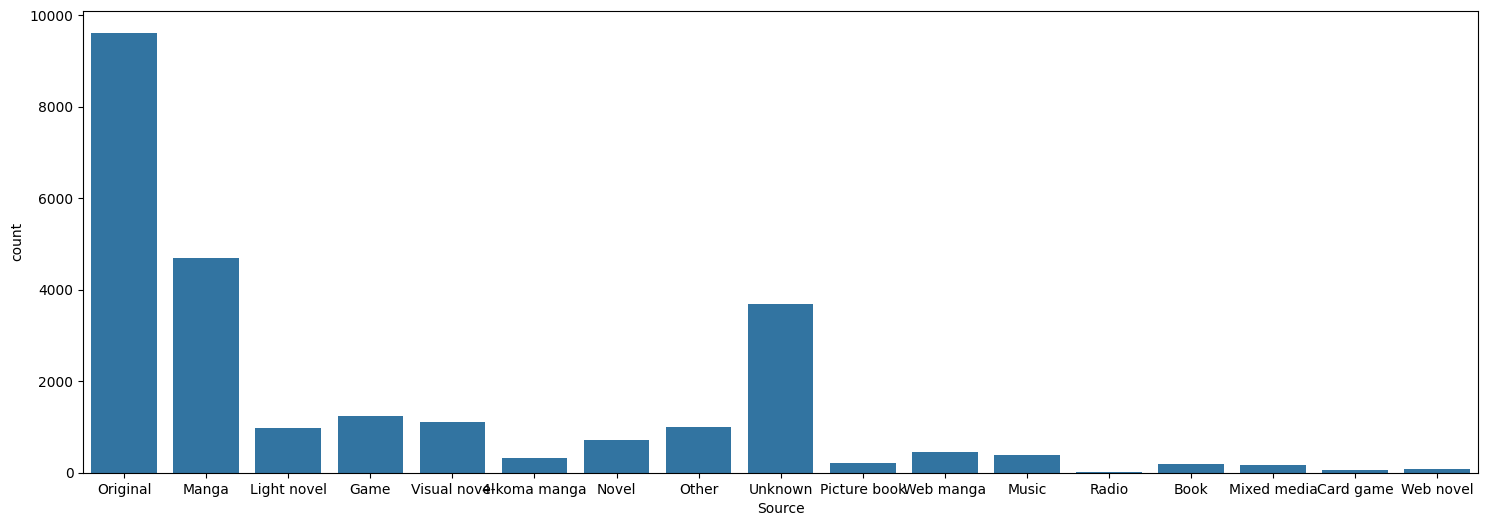

In [14]:
plt.figure(figsize=(18,6))
sns.countplot(anime_df, x='Source')
plt.show()

## ...


In [15]:
anime_df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,index
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...,1
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,2
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,3
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,4


In [16]:
anime_df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'index'],
      dtype='object')

In [17]:
relavant_data = ['Name', 'English name', 'Other name', 'Genres', 'Synopsis', 'Studios']

In [18]:
# merge data into one column
df = anime_df['Name'] + '' + anime_df['English name'] + '' + anime_df['Other name'] + '' + anime_df['Genres'] + '' + anime_df['Synopsis'] + anime_df['Studios']
df

0        Cowboy BebopCowboy BebopカウボーイビバップAction, Award...
1        Cowboy Bebop: Tengoku no TobiraCowboy Bebop: T...
2        TrigunTrigunトライガンAction, Adventure, Sci-FiVash...
3        Witch Hunter RobinWitch Hunter RobinWitch Hunt...
4        Bouken Ou BeetBeet the Vandel Buster冒険王ビィトAdve...
                               ...                        
24900    Wu Nao MonuUNKNOWN无脑魔女Comedy, Fantasy, Slice o...
24901    Bu Xing Si: Yuan QiBlader Soul捕星司·源起Action, Ad...
24902    Di Yi XulieThe First Order第一序列Action, Adventur...
24903    Bokura no Saishuu SensouUNKNOWN僕らの最終戦争UNKNOWNA...
24904    Shijuuku NichiUNKNOWN四十九日UNKNOWNA music video ...
Length: 24905, dtype: object

In [19]:
# conver data to numerical data
vectorizer = TfidfVectorizer()
vectorized_df = vectorizer.fit_transform(df)

In [20]:
print(vectorized_df)

  (0, 79795)	0.05005670969574511
  (0, 91650)	0.08563210410546544
  (0, 59004)	0.04307934626300687
  (0, 27823)	0.017581962032928097
  (0, 67633)	0.06185889403181333
  (0, 59588)	0.0418229843703183
  (0, 25094)	0.04345522559962076
  (0, 56904)	0.06633444161051395
  (0, 47537)	0.03476459658794959
  (0, 9038)	0.04181459119283259
  (0, 13662)	0.07006900245674426
  (0, 55174)	0.04155768464524604
  (0, 88166)	0.07139615471433083
  (0, 16050)	0.05626286584785973
  (0, 62912)	0.0616895562974515
  (0, 50231)	0.09770122148873552
  (0, 68182)	0.06027742877577468
  (0, 6473)	0.025125326680751597
  (0, 28373)	0.027013892189960954
  (0, 51775)	0.07923558767441005
  (0, 20053)	0.08458418141834102
  (0, 48483)	0.044638300189126616
  (0, 16679)	0.062443989720579136
  (0, 12134)	0.059799241187042856
  (0, 14972)	0.07111692514386866
  :	:
  (24902, 71273)	0.1567802695624743
  (24903, 72719)	0.36266885254126263
  (24903, 72707)	0.2826018759753586
  (24903, 9911)	0.5119690671913811
  (24903, 70093)	0.5765

In [21]:
# using cosine similarity to evaluate the numerical text data
cos_similarity = cosine_similarity(vectorized_df)

print(cos_similarity)

[[1.         0.29791635 0.1091562  ... 0.0067093  0.01711097 0.01779785]
 [0.29791635 1.         0.10341057 ... 0.00863279 0.01422773 0.01012827]
 [0.1091562  0.10341057 1.         ... 0.01438087 0.01211121 0.01259739]
 ...
 [0.0067093  0.00863279 0.01438087 ... 1.         0.01057314 0.01099757]
 [0.01711097 0.01422773 0.01211121 ... 0.01057314 1.         0.17450677]
 [0.01779785 0.01012827 0.01259739 ... 0.01099757 0.17450677 1.        ]]


In [22]:
cos_similarity.shape

(24905, 24905)

In [23]:
# creating a list for all of the anime names
title_list = anime_df['Name'].tolist()
title_list

['Cowboy Bebop',
 'Cowboy Bebop: Tengoku no Tobira',
 'Trigun',
 'Witch Hunter Robin',
 'Bouken Ou Beet',
 'Eyeshield 21',
 'Hachimitsu to Clover',
 'Hungry Heart: Wild Striker',
 'Initial D Fourth Stage',
 'Monster',
 'Naruto',
 'One Piece',
 'Tennis no Ouji-sama',
 'Ring ni Kakero 1',
 'School Rumble',
 'Sunabouzu',
 'Texhnolyze',
 'Trinity Blood',
 'Yakitate!! Japan',
 'Zipang',
 'Neon Genesis Evangelion',
 'Neon Genesis Evangelion: Death & Rebirth',
 'Neon Genesis Evangelion: The End of Evangelion',
 'Kenpuu Denki Berserk',
 'Koukaku Kidoutai',
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
 'Rurouni Kenshin: Meiji Kenkaku Romantan',
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Ishinshishi e no Chinkonka',
 'Akira',
 '.hack//Sign',
 'Aa! Megami-sama!',
 'Aa! Megami-sama! (TV)',
 'Tenshi Kinryouku',
 'Kidou Tenshi Angelic Layer',
 'Ai Yori Aoshi',
 'Appleseed (Movie)',
 'Arc the Lad',
 'Avenger',
 'Beck',
 'Blue Gender',
 'Chobits',
 'Chrno Crusade',
 'D.N.Angel',
 'D.C.: 

In [24]:
# user input
user_input = input('Anime name: ')

Anime name: frieren


In [25]:
# difflib, comparing the input name to the list of names

close_match = difflib.get_close_matches(user_input, title_list)
close_match

['Crier', 'Sexfriend', 'Boyfriend']

In [26]:
closest_match = close_match[0]
closest_match

'Crier'

In [27]:
index_of_anime = anime_df[anime_df.Name == closest_match]['index'].values[0]
index_of_anime

16515

In [28]:
anime_df[anime_df.index == index_of_anime]['Name'].values[0]

'Crier'

In [35]:
# list of similar animes based on the input anime of the user

cos_similarity_of_userinput = list(enumerate(cos_similarity[index_of_anime]))
cos_similarity_of_userinput

[(0, 0.04196900872268655),
 (1, 0.03516079165084897),
 (2, 0.0581120487835879),
 (3, 0.044755664113610774),
 (4, 0.033162967515825204),
 (5, 0.025076484154690413),
 (6, 0.04396260079346244),
 (7, 0.029913392298463102),
 (8, 0.03519465743243775),
 (9, 0.04894724997202041),
 (10, 0.03012864845185165),
 (11, 0.06705713301622913),
 (12, 0.04966079153221885),
 (13, 0.027401629444888005),
 (14, 0.05523654595492948),
 (15, 0.04640103581560566),
 (16, 0.05793636097296061),
 (17, 0.046017595942364084),
 (18, 0.03982613291249751),
 (19, 0.03870230271059257),
 (20, 0.050003456154757465),
 (21, 0.027327936770479174),
 (22, 0.0316086234030645),
 (23, 0.036875178835365195),
 (24, 0.04751021022161177),
 (25, 0.053818108889277405),
 (26, 0.029620594514759256),
 (27, 0.027191862628736886),
 (28, 0.07258996518462513),
 (29, 0.039999011644393935),
 (30, 0.024869259344942118),
 (31, 0.039209555206274914),
 (32, 0.044149594425848704),
 (33, 0.007694155809245753),
 (34, 0.03743271260862207),
 (35, 0.0401623

In [38]:
# sorting the animes based on their cosine similarity score
sorted_anime_similarity = sorted(cos_similarity_of_userinput, key= lambda x: x[1], reverse=True) # key, sort data based on the first index which is the cos_similarity
sorted_anime_similarity[:10]

[(16515, 1.0000000000000004),
 (16514, 0.23925010704500396),
 (11317, 0.18084434290231732),
 (16509, 0.16909887989699623),
 (15304, 0.1663769736155161),
 (18030, 0.16531599554590892),
 (17661, 0.16217062862498255),
 (16794, 0.14559630609544602),
 (16502, 0.14450922785857429),
 (22242, 0.14287253821810797)]

In [39]:
# create a loop to give the name of the anime based on its index

i = 1

for anime in sorted_anime_similarity:
  index = anime[0]
  anime_name = anime_df[anime_df.index == index]['Name'].values[0]

  if (i<11):
    print(f'{i}. {anime_name}')
    i += 1

1. Crier
2. Irony
3. Pretty x Cation The Animation
4. Raspberry＊Monster
5. Haita
6. My Name Is Elite☆
7. Idol Shineitai
8. Vocaloid Culture
9. Mozaik Role


In [41]:
# combine all of the code
user_input = input('Anime name: ')

title_list = anime_df['Name'].tolist()

close_match = difflib.get_close_matches(user_input, title_list)

closest_match = close_match[0]

index_of_anime = anime_df[anime_df.Name == closest_match]['index'].values[0]

cos_similarity_of_userinput = list(enumerate(cos_similarity[index_of_anime]))

sorted_anime_similarity = sorted(cos_similarity_of_userinput, key= lambda x: x[1], reverse=True)


i = 1

for anime in sorted_anime_similarity:
  index = anime[0]
  anime_name = anime_df[anime_df.index == index]['Name'].values[0]

  if (i<11):
    print(f'{i}. {anime_name}')
    i += 1

Anime name: jujutsu kaisen
1. Jujutsu Kaisen
2. Jujutsu Kaisen Official PV
3. Shakugan no Shana Movie
4. Jujutsu Kaisen 2nd Season
5. Grisaia no Rakuen
6. Grisaia no Meikyuu: Caprice no Mayu 0
7. Tensei Kenja no Isekai Life: Dai-2 no Shokugyou wo Ete, Sekai Saikyou ni Narimashita
8. Choujin Sentai Baratack
9. Grisaia no Kajitsu
10. Master Piece The Animation
